In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C://Users//FARNANDO//Downloads//dataset_X.csv//dataset_X.csv")
df.head()

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_code,First_Name,Last_Name,Area_Code,Gender,Call_Count
0,9545434,False,5265,42,147,2,37.0,Jk,Jk,2302,Male,1
1,9211206,False,5226,74,146,2,37.0,Em,Sh,1501,Male,10
2,8873010,False,4452,35,144,2,37.0,BI,MI,1550,Male,9
3,9852034,False,5461,40,149,2,37.0,WT,LI,1401,Male,6
4,9416548,False,5298,26,147,2,37.0,LA,LA,125,Female,12


In [3]:
df.shape

(100000, 12)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Call_ID          0
Sale            32
Agent_ID      2315
Age              0
Product_ID       0
Timezone         0
Phone_code      28
First_Name     682
Last_Name      681
Area_Code      460
Gender           0
Call_Count       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Call_ID     100000 non-null  int64  
 1   Sale        99968 non-null   object 
 2   Agent_ID    97685 non-null   object 
 3   Age         100000 non-null  int64  
 4   Product_ID  100000 non-null  int64  
 5   Timezone    100000 non-null  int64  
 6   Phone_code  99972 non-null   float64
 7   First_Name  99318 non-null   object 
 8   Last_Name   99319 non-null   object 
 9   Area_Code   99540 non-null   object 
 10  Gender      100000 non-null  object 
 11  Call_Count  100000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


In [7]:
df.drop(['Timezone', 'Phone_code', 'Area_Code'], axis= 1 , inplace=True)

In [8]:
df.dropna(inplace= True)
df.isnull().sum(), df.shape

(Call_ID       0
 Sale          0
 Agent_ID      0
 Age           0
 Product_ID    0
 First_Name    0
 Last_Name     0
 Gender        0
 Call_Count    0
 dtype: int64,
 (96525, 9))

In [9]:
df.head(1)

,Call_ID,Sale,Agent_ID,Age,Product_ID,First_Name,Last_Name,Gender,Call_Count
0,9545434,False,5265,42,147,Jk,Jk,Male,1


In [10]:
df.Sale.value_counts()

False    88076
True      8449
Name: Sale, dtype: int64

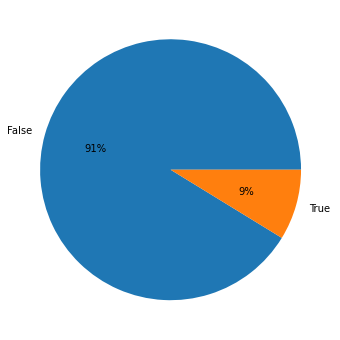

In [11]:
plt.figure(figsize=(10,6))
plt.pie(df.Sale.value_counts(), labels=['False', 'True'], autopct='%.0f%%');

**As we see:**
* Only 9% of Telemarketing converted into sales  

In [12]:
df.Product_ID.value_counts()

148    15068
146    14985
147    14887
149    14667
145    10357
150     9530
144     5906
151     5686
143     3727
142     1712
Name: Product_ID, dtype: int64

In [13]:
df.Gender.value_counts()

Male      50402
Female    45192
Others      931
Name: Gender, dtype: int64

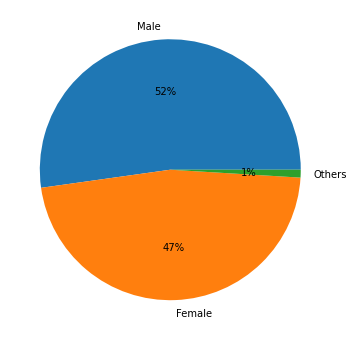

In [14]:
plt.figure(figsize=(10,6))
plt.pie(df.Gender.value_counts(), labels=['Male', 'Female', 'Others'], autopct='%.0f%%');

* Male forms 52% of total customers
* while female are 47%

In [15]:
df.groupby(['Gender'])['Sale'].value_counts()

Gender  Sale 
Female  False    41473
        True      3719
Male    False    45795
        True      4607
Others  False      808
        True       123
Name: Sale, dtype: int64

In [16]:
df.Call_Count.value_counts()

1     35536
2     19685
3     11789
4      7211
5      4616
9      4165
6      3340
7      3280
8      2661
12     1054
10     1042
15      865
11      748
13      255
14      251
16       15
17        5
19        2
29        1
38        1
21        1
22        1
55        1
Name: Call_Count, dtype: int64

**We will segment Call Count column to be easily handled**

In [17]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 55]
bin_names = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '>30']
df['Call_range'] = pd.cut(df['Call_Count'], bin_edges, labels= bin_names)

In [18]:
df.Call_range.value_counts()

1-5      78837
6-10     14488
11-15     3173
16-20       22
21-25        2
>30          2
26-30        1
Name: Call_range, dtype: int64

In [19]:
df.groupby('Call_range')['Sale'].value_counts()

Call_range  Sale 
1-5         False    71477
            True      7360
6-10        False    13566
            True       922
11-15       False     3007
            True       166
16-20       False       21
            True         1
21-25       False        2
26-30       False        1
>30         False        2
Name: Sale, dtype: int64

* Call count didn't affect on percentage of sale

In [20]:
df_sale = df.query('Sale == True')
df_nosale = df.query('Sale == False')

In [21]:
df_sale.Age.mean() , df_nosale.Age.mean()

(52.38430583501006, 52.57362959262455)

* Mean age of sales in the two data is very close to each other,
* Which means that age doesn't affect sales.

c:\Users\FARNANDO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

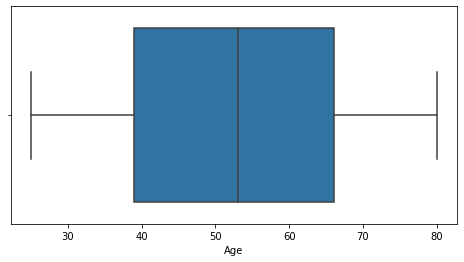

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(df['Age'])

* As we see above the mean age is around 52 years.

In [23]:
df_sale['Product_ID'].value_counts()

148    1616
149    1407
146    1130
145    1130
147    1049
150     922
144     458
151     401
143     219
142     117
Name: Product_ID, dtype: int64

In [24]:
df_nosale['Product_ID'].value_counts()

146    13855
147    13838
148    13452
149    13260
145     9227
150     8608
144     5448
151     5285
143     3508
142     1595
Name: Product_ID, dtype: int64

c:\Users\FARNANDO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_ID', ylabel='count'>

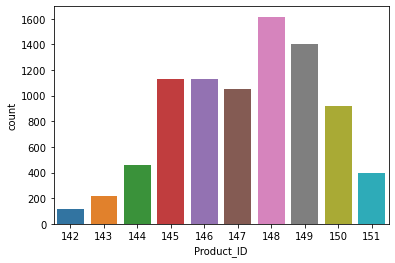

In [25]:
sns.countplot(df_sale['Product_ID'])

c:\Users\FARNANDO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_ID', ylabel='count'>

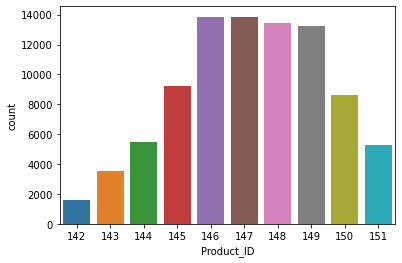

In [26]:
sns.countplot(df_nosale['Product_ID'])

* The most two products sold are 148, 149 of product_ID

* And the most two products with false sale are 146, 147 of product_ID

**Final Conclusion:**

* Only 9% of Telemarketing converted into sales.  
* Male forms 52% of total customers.
* while female are 47%.
* Call count didn't affect on percentage of sale.
* The mean age is around 52 years.
* Mean age of sales in the two data is very close to each other,
* Which means that age doesn't affect sales.
* The most two products sold are 148, 149 of product_ID
* And the most two products with false sale are 146, 147 of product_ID


**Recommendations:**

* Marketing department need to change this campaign.
* It will be helpful to target specific segments and make the campaign more specific.
* This data lacks of some useful data like the number of sales of each customer to make deep analysis on it.

